# Lecture 16

- Trade-offs in hypothesis testing
- Goodness-of-fit measures

## Last class

* We saw the **Z-test** (known variance)
* We saw the **T-test** (unknown variance)

<div class="alert alert-info">
    <b>Z-Test</b>
    
A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. Z-tests test the mean of a distribution.

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from two RVs $X$ and $Y$, respectively, with common variance $\sigma^2$. We can build the statistic:

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

where $E[T] = 0$, $\operatorname{Var}[X] = \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)$ and 

\begin{align*}
T \sim G\left(0, \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)\right)
\end{align*}

</div>

## T-test

Unknown variance: we have to approximate the variance.

If we use our *unbiased* estimator for the variance, then the distribution of

\begin{align*}
\frac{\hat{\mu}-\mu}{S_{N-1}/\sqrt{N}}
\end{align*}

has a **Student’s $t$-distribution with $N-1$ degrees of freedom (dof)**.

* The density and distribution functions for the **Student's $t$-distribution** are shown on its [Wikipedia page](https://en.wikipedia.org/wiki/Student's_t-distribution).

* Unlike the Gaussian distribution, the distribution function for Student’s t-distribution is in closed form for several values of $\nu$ (degrees of freedom or dof).

In [2]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

## Today
* We will visualize **trade-offs in hypothesis testing**
* We will look at some **goodness-of-fit measures**

In [18]:
norm = stats.norm() #G(0,1)

t1 = stats.t(1) # student's t-distribution with dof=1
t2 = stats.t(2) # student's t-distribution with dof=2
t5 = stats.t(5)
tnf = stats.t(100_000)

In [19]:
norm.stats('mvsk')

(array(0.), array(1.), array(0.), array(0.))

In [20]:
t1.stats('mvsk')

(array(inf), array(nan), array(nan), array(nan))

In [21]:
t2.stats('mvsk')

(array(0.), array(inf), array(nan), array(nan))

In [22]:
t5.stats('mvsk')

(array(0.), array(1.66666667), array(0.), array(6.))

In [23]:
tnf.stats('mvsk')

(array(0.), array(1.00002), array(0.), array(6.00024001e-05))

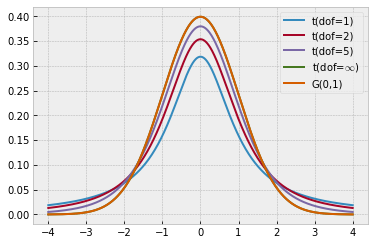

In [26]:
x = np.linspace(-4,4,1000)
plt.plot(x, t1.pdf(x),label='t(dof=1)')
plt.plot(x, t2.pdf(x),label='t(dof=2)')
plt.plot(x, t5.pdf(x),label='t(dof=5)')
plt.plot(x, tnf.pdf(x),label='t(dof=$\infty$)')
plt.plot(x,norm.pdf(x),label='G(0,1)')
plt.legend();

**<font color=blue>Example 1</font> Analytical Test on Difference of Means (T-Test)**

Conduct an **analytical** binary hypothesis test on whether urban and rural populations have different firearms mortality rates.

In [30]:
df = pd.read_csv('firearms-urban.csv')
df

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0
5,CO,12.2,86.2
6,CT,5.0,88.0
7,DE,11.1,83.3
8,FL,11.5,91.2
9,GA,13.7,75.1


Recall the data "firearms-urban.csv" where the columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states. Although this data is 2010, it should be sufficiently accurate for our purposes.

In [31]:
# Use the STATE column as the index

df = df.set_index('STATE')
df

,RATE-2014,Percent Urban
STATE,,
AL,16.9,59.0
AK,19.2,66.0
AZ,13.5,89.8
AR,16.6,56.2
CA,7.4,95.0
CO,12.2,86.2
CT,5.0,88.0
DE,11.1,83.3
FL,11.5,91.2


In [32]:
df.loc['FL']

RATE-2014        11.5
Percent Urban    91.2
Name: FL, dtype: float64

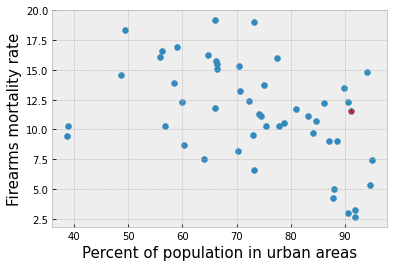

In [33]:
# Plot the data
# Highlight the point for Florida

plt.scatter(df['Percent Urban'],df['RATE-2014'])
plt.scatter(df.loc['FL']['Percent Urban'],df.loc['FL']['RATE-2014'],marker='*',c='r')
plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [35]:
df['RATE-2014'][df['Percent Urban']<80].shape # rural

(32,)

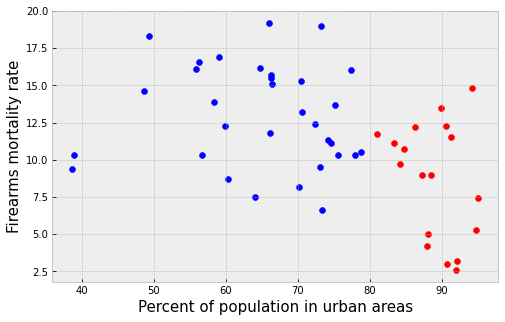

In [37]:
# Let's consider:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

plt.figure(figsize=(8,5))

plt.scatter(df['Percent Urban'][df['Percent Urban']<80].to_numpy(),df['RATE-2014'][df['Percent Urban']<80],c='b')
plt.scatter(df['Percent Urban'][df['Percent Urban']>=80].to_numpy(),df['RATE-2014'][df['Percent Urban']>=80],c='r')

plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [41]:
# Let's the firearm mortality rate for 2014 where:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

# Extract data
urban = df['RATE-2014'][df['Percent Urban']>=80].to_numpy()
rural = df['RATE-2014'][df['Percent Urban']<80].to_numpy()

# Estimate Density using KDE
f_urban = stats.gaussian_kde(urban) # Kernel Density Estimation with Gaussian kernel
f_rural = stats.gaussian_kde(rural)


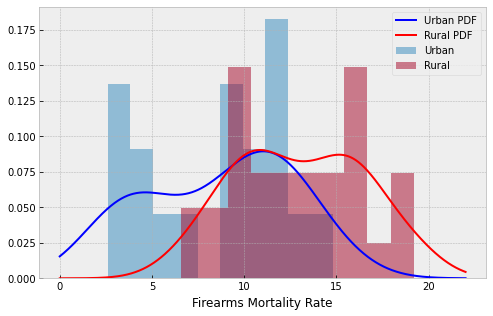

In [42]:
plt.figure(figsize=(8,5))
x = np.linspace(0,22,1000)

plt.hist(urban,alpha = 0.5, label = 'Urban', density = True)
plt.hist(rural,alpha = 0.5, label = 'Rural', density = True)
plt.plot(x,f_urban.pdf(x), 'b', label = 'Urban PDF')
plt.plot(x,f_rural.pdf(x), 'r', label = 'Rural PDF')

plt.legend()
plt.xlabel('Firearms Mortality Rate');

In [43]:
# sample mean for each sample

urban.mean(), rural.mean()

(8.677777777777777, 12.99375)

In [45]:
diff = rural.mean() - urban.mean()
diff

4.315972222222223

* Let's construct a **two-sided binary hypothesis test** using analytical techniques and determine the probability of such a large difference in means under the null hypothesis.

The data comes from a single distribution, which implies same means and same variances.

So, we will use the **T-random variable** to model this. We know: mean of $T$ is 0, and we need to calculate the variance from the data.

In [46]:
pooled = df['RATE-2014']

pooled_mean = pooled.mean()
pooled_mean

11.440000000000003

In [47]:
pooled

STATE
AL    16.9
AK    19.2
AZ    13.5
AR    16.6
CA     7.4
CO    12.2
CT     5.0
DE    11.1
FL    11.5
GA    13.7
HI     2.6
ID    13.2
IL     9.0
IN    12.4
IA     7.5
KS    11.3
KY    13.9
LA    19.0
ME     9.4
MD     9.0
MA     3.2
MI    11.1
MN     6.6
MS    18.3
MO    15.3
MT    16.1
NE     9.5
NV    14.8
NH     8.7
NJ     5.3
NM    16.0
NY     4.2
NC    11.8
ND    12.3
OH    10.3
OK    15.7
OR    11.7
PA    10.5
RI     3.0
SC    15.5
SD    10.3
TN    15.1
TX    10.7
UT    12.3
VT    10.3
VA    10.3
WA     9.7
WV    14.6
WI     8.2
WY    16.2
Name: RATE-2014, dtype: float64

In [49]:
# Sample unbiased estimator for the variance
np.sum((pooled-pooled_mean)**2)/(len(pooled)-1)


17.220408163265304

In [50]:
# Alternative
pooled_var = np.var(pooled,ddof=1) # ddof = delta degrees of freedom

pooled_var


17.22040816326531

In [51]:
# We need to calculate the variance of the difference of sample mean estimators
sm_var = pooled_var*(1/len(urban)+1/len(rural))
sm_var

1.4948270975056694

In [52]:
# Last parameter of T: degrees of freedom
N = len(urban)+len(rural)-1
dof = N -1
dof


48

Calculate the t-distribution and perform the test

In [53]:
myt = stats.t(dof, scale=np.sqrt(sm_var))


# We set the variance of the T random variable here

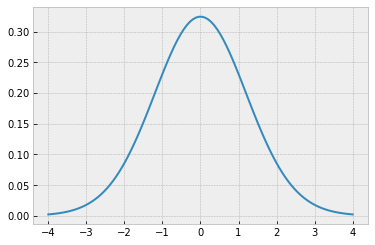

In [55]:
t=np.linspace(-4,4,100)
plt.plot(t,myt.pdf(t));

In [56]:
# 1-sided test

myt.sf(diff)


0.000463991896118919

In [57]:
# 2-sided test

2*myt.sf(diff)


0.000927983792237838

In [58]:
# other 1-sided

myt.cdf(-diff)


0.000463991896118919

**Conclusion:** 

The p-value is much smaller than $\alpha=0.01$, therefore we REJECT the null hypothesis that the means of the populations for urban firearms mortality rate and rural firearms mortality rate are the same.

___

**<font color=blue>Example 2</font>** Use the Student's $T$ random variable to determine a 95% confidence interval for the mean difference under the null hypothesis. Is the resulting confidence interval compatible with the observed difference of means?

*Hint:* The inverse CDF function in ```scipy.stats``` is called the Percent point function (PPF) and is given by the ```ppf``` method of random variable objects.

<!-- The 95% confidence interval is the interval $[a,b]$ for which $P(T \le a) =0.025$ and $P(T\ge b) = 0.025$

Thus
$P(T \le a) = F_T(a) =0.025$, which is satisfied if $a = F_{T}^{-1}(0.025)$

Similarly,
$P(T \leq b) = 0.975$ and $P(T \ge b) = 1 - F_T(b) +P(T=b) =1- F_T(b) =0.025$, which is satisfied if 
$b= F_{T}^{-1}(0.975)$

Thus, the 95% confidence interval is: -->

**Conclusion:**

<!-- Since the 95% confidence interval does not contain the observed mean difference, we say it is not compatible with the assumption that this data comes from the same distribution (in particular, it is incompatible with even the means of the distributions being equal). Therefore this is a statistically significant event, therefore we reject the null hypothesis. -->

# Errors and Performance Tradeoffs in Hypothesis Testing

* In binary hypothesis testing, there are two types of errors:

    1. **False Alarm** (Type I Error, also called *False Positive*)
        * occurs if we accept a hypothesis when it is not true
        * we will use the notation
        \begin{align*}
        P_{fa} = P(\text{false alarm})
        \end{align*}
    
    2. **Miss** (Type II Error, also called *False Negative*)
        * occurs if we reject a hypothesis when it is actually true
        * we will use the notation
        \begin{align*}
        P_m = P(\text{miss})
        \end{align*}

* When performing a hypothesis test, there is always a tradeoff between these two types of errors

* The tradeoff is controlled by choosing the significance level, $\alpha$, to which the p-value is compared with
    * the value $\alpha$ is the probability that we will reject the null hypothesis, $H_0$ when it is in fact true
    * equivalently, it is the probability of accepting the alternative hypothesis, $H_1$, when $H_1$ is false
    
* Even though the binary hypothesis test is usually conducted under the assumptions of $H_0$, we are usually conducting it to determine whether $H_1$ is the cause of the observed difference
    * thus, we will consider the implications with respect to $H_1$ when labeling errors
    * so for the case that we accept $H_1$ when it is false, we call that a **false alarm/Type I error**
    * then $P_{fa} = \alpha$
    
* Note that if we decrease $\alpha$, then we decrease $P_{fa}$, but we also decide that the null hypothesis could be true when it is in fact false
    * i.e., we increase the **Probability of Miss/Type II error**, $P_m$

* The converse is also true.

# Binary Decisions from Continuous Data

* We have many situations where we have a continuous measurement that depends on some underlying binary phenomena.

* For example, we may wish to determine the presence of a disease based on the measurement of some chemical
     * Then the distribution of the data depends on whether the disease is present or not.
     
* More generally, we assume the data comes from one of two continuous densities, $f_0(x|H_0)$ or $f_1(x|H_1)$, and we wish to make a decision between $H_0$ and $H_1$ based on an observed value $x$

* We will choose $H_i$ if $x\in R_i$, where $R_0$, $R_1$ are partitions of the real line

* The probability of false alarm and probability of miss then depend on the decision regions $R_0$ and $R_1$

* In many cases, the decision regions are determined by a single threhold $\gamma$, like $R_0 = x < \gamma$ and $R_1 = x > \gamma$

___

**<font color=blue>Example 1</font>**
The PSA (Prostate-Specific Antigen) values for men in their 60s without cancer are approximately Gaussian(2,$\sigma^2=1$). The PSA values for men in their 60s with cancer are approximately Gaussian(4,$\sigma^2=2$).

In [ ]:
def drawMAP(p0): 
    # Setup RVs
    
    
    
    x=np.linspace(-1,8,1001)
    p1=1-p0 # prior probability (p0 is given)
        
    # plot the weighted densities:
    # these are proportional to the APPs
    plt.plot(x,p0*G0.pdf(x),label='$f_X(x|H_0)P(H_0)$')
    plt.plot(x,p1*G1.pdf(x),label='$f_X(x|H_1)P(H_1)$')
    
    # Determine the regions where the APP for 0 is 
    # bigger and the APP for 1 is bigger
    R0=x[np.where(p0*G0.pdf(x)>= p1*G1.pdf(x))]
    R1=x[np.where(p0*G0.pdf(x)< p1*G1.pdf(x))]

    # Fill under the regions found above
    plt.fill_between(R0,p0*G0.pdf(R0),alpha=0.3,label='Decide $H_0$')
    plt.fill_between(R1,p1*G1.pdf(R1),alpha=0.3,label='Decide $H_1$')
    plt.legend()
    
    # Print the MAP threshold
    print('Reject the Null Hypothesis H0 if PSA is >',round(R1[0],2))

1. For $P_{fa} = 10$%, find $P_m$
    
<!-- \begin{align*}
P_{fa} &= 0.1 \\
Q\left(\frac{\gamma-2}{\sqrt{\sigma^2}}\right) &= 0.1 \\
Q\left(\frac{\gamma-2}{\sqrt{1}}\right) &= 0.1 \\
\gamma - 2 &= Q^{-1}(0.1) \\
\gamma - 2 &= 1.28 \\
\gamma &\approx 3.28
\end{align*}

\begin{align*}
P_m = Q\left(\frac{4 - 3.28}{\sqrt{2}}\right) \approx 0.305
\end{align*} -->

2. For $P_m = 10$%, find $P_{fa}$

<!-- \begin{align*}
P_m &= 0.1 \\
Q\left(\frac{4 - \gamma}{\sqrt{2}}\right) &= 0.1 \\
\frac{4-\gamma}{\sqrt{2}} &\approx 1.28\\
\gamma &\approx 2.19
\end{align*}

\begin{align*}
P_{fa} = Q\left(\frac{2 - 2.19}{1}\right) \approx 0.425
\end{align*} -->

___

# Visualizing Tradeoffs in Hypothesis Testing: ROC Curves

* We can visualize the relation between these types of errors using a ROC curve
    * ROC stands for *receiver operating characteristic*
    * ROC curves were developed for RADAR systems but are widely used in fields of statistical tests, such as biomedicine

* In ROC curves, we do not plot $P_{fa}$ vs $P_m$

* Instead:
    * the x-axis is **FPR (false positive rate)**
    \begin{align*}
    \text{FPR}=P_{fa}
    \end{align*}
    
    * the y-axis is **TPR (true positive rate)**
    \begin{align*}
    \text{TPR}=1-P_m
    \end{align*}

## Area Under the Curve (AUC)

*Area Under Curve (AUC)* is a common measure of how good a test is. It is simply the area under the ROC curve. Random guessing can achieve the diagonal line, so the minimum AUC is 1/2. The maximum AUC is 1, which is achieved by a test that is always right; the ROC curve is along the left and top axes.

**<font color=blue>Example 2</font>** Plot the performance if the variance of each PSA test is reduced by a factor of 4. What is the AUC?

___

# Testing Goodness-of-Fit

The goodness of fit of a statistical model describes how well it fits a set of observations. Measures of goodness of fit typically summarize the discrepancy between observed values and the values expected under the model in question.

## Testing Whether Data Comes from a Distribution: Discrete Distributions

* Given a set of random data and a proposed model, how could we determine if the data could have reasonably come from that model?

* For example, given values from a six-sided die, how could you tell if the die is fair? 

#### <font color=blue>Example 3</font>

In [ ]:
# Draw 60 values from a fair 6-sided die:



* Even after 60 rolls, the numbers still vary significantly

* We could compare them to the expected values:

#### <font color=blue>Example 4</font>

The file "baseball.pickle" contains the birth months of major league baseball players.

> [```pickle```](https://docs.python.org/3/library/pickle.html) is a Python object serialization library.

Observations and Comments:

* Note that more MLB players are born in August than any other month

* Some people claim that this is because in little league baseball through 2006, the cutoff for determing a player's age eligibility was July 31st

* That is, a player who was turning 9 that year would not be eligible to play in the 8 & Under league if their birthday was before August 1st. 

* Thus, players with July birthdays were the youngest (and, on average, smallest) in their leagues, and player with August birthdays were the oldest (and, on average, largest)

Let's start by comparing the data values in the cells to the expected values for those cells 

* **We assume a uniform distribution of birthdays over the year**

Then we can get the expected number of birthdays in a month as the probability a player is born in a month (which is just the number of days in the month divided by 365) times the total number of players in the table:

In [ ]:
days_in_month=np.array([31,28,31,30,31,30,31,31,30,31,30,31])

Now we can compare the data to the expected values:

Observations:

* August through November seem to be overrepresented, but how can we test it, with 12 different values?

* Let's start by computing the errors:

* Now we need to turn the errors into a single test statistic

* Note that the errors are both positive and negative

* We solve this in the same way we have before, let's start by looking at the total squared error (also called the total deviation):

* Then we can carry out our statistical test in the usual way

* We draw examples from the distribution under $H_0$ and then see how often we get such a large total deviation:

In [ ]:
num_sims=1000
count=0
for sim in range(num_sims):
    
    
    
        
print('Prob of seeing a result this extreme is', count/num_sims)

**Conclusion:** 
<!-- The result is statistically significant. MLB players' birthdays are not uniformly distributed throughout the year. -->

* Note that some months have more days than others. Those months will naturally have more variation than months with more days because the expected counts will be smaller

* To compensate for this effect, it is instead common to normalize the cell deviations by dividing by the expected value of that cell:

After normalizing, we can again calculate a statistic that is a sum of the normalized deviations:

For reasons we will discuss later, this is called the **chi-squared statistic** with $N-1$ degrees of freedom (dof), i.e.

\begin{align*}
\sum_{i=1}^N \frac{(O_i - E_i)^2}{E_i} \sim \chi^2(\text{dof}= N-1)
\end{align*}

where $O_i$ is the observed value, $E_i$ is the expected value and $N$ is the total number of random values.

In [ ]:
x = np.linspace(0,20,1000)

plt.figure(figsize=(8,5))
#
#

In [ ]:
x = np.linspace(0,50,1000)




In [ ]:
print('p-value = ', )

We can carry out a similar simulation test as above.

In [ ]:
num_sims=1000
count=0
for sim in range(num_sims):
    
    
    
        
print('Prob of seeing a result this extreme is',count/num_sims)

**Conclusion:** 
<!-- The result is statistically significant. MLB players' birthdays are not uniformly distributed throughout the year. -->

___

#### <font color=blue>Example 2</font>

Instead, let's try another baseball example:

(From *Mathematical Statistics with Resampling and R* By Laura M. Chihara, Tim C. Hesterberg)

The file "homeruns.pickle" contains the homerun data for the Philadelphia Phillies in 2009.

Each entry is the number of games with the corresponding index number of homeruns:

* What distribution might this come from??
<!--     * Poisson? -->

* What do we need to specify that distribution?
<!--     * Need the average number of HRs/game (i.e., the mean of the distribution) -->

It looks like a good fit. BUT we should test it:

We think that this probably comes from this Poisson distribution. If so, the simulation should produce a p-value >> 0.055

In [ ]:
num_sims=1000
count=0
for sim in range(num_sims):
    
    
    
    
        
print('Prob of seeing a result this extreme is',count/num_sims)

**Conclusion:** 

<!-- It is likely that this data matches a Poisson distribution. -->

___

## Testing Whether Data Comes from a Distribution: Continuous Distributions 

#### <font color=blue>Example 3</font> 

Consider the data in "lightbulb.pickle".

How should we determine what distribution this data comes from?

* Let's look at what sorts of values we got:

The values seem to be coming from throughout the positive real line -- this data is from a continous distribution. 


Now we need to try to determine which continuous distribution is a good fit for the data.

1. Start by plotting a histogram of the data. Adjust the number of bins to provide an appropriate amount of resolution to help infer what distribution this might be from.

Clearly the data is not Gaussian/Normal or Uniform. 

* Of the distributions we have considered, this seems to match the exponential random variable. 

Assuming that this is from an exponential distribution, we can compare the histogram of the data with that from the theoretical model. The exponential distribution is characterized by a single parameter, either $\lambda$ or $\mu=1/\lambda$, which is the mean.

2. Let's estimate the mean of the reference distribution. We know that the sample mean estimator is an unbiased estimate of the mean:

3. Now create an exponential random variable object and draw data from this reference distribution:

The match is not perfect, but they are similar. 

* Since this data comes from a continuous distribution, kernel density estimation (KDE) would be even better than a histogram!

In [ ]:
x = np.linspace(0,3500,10000)

# 
# 

___

## Quantile-Quantile (Q-Q) Plot

Let's investigate other ways that we can visually compare these data. We will first generate a **quantile-quantile (Q-Q) plot** for the data.

* The $k$th **quantile** from a data set of length $n$ is the data point that is $k/n$th of the way through the ordered set.  

* In a Q-Q plot, we plot the data at a particular quantile in one data set vs the data at a particular quantile in another data set. 

Read the wikipedia page on Q-Q plots: https://en.wikipedia.org/wiki/Q–Q_plot

We will only consider the easiest case, which is when the data sets are of the same size. In that case, we can just plot the sorted values with respect to each other:




If the data is from the same distribution, the plot should be approximately linear!

When we are comparing data to a known distribution, we can get the exact quantiles from the distribution of the random variable, rather than using samples from the random variable. 

Sometimes this type of plot is called a **probability plot**, and I will use that terminology in this class. More generally, the term probability plot is sometimes used to refer to a broader class of plots including the Q-Q plot. **We can get the quantiles from a distribution using the inverse CDF (in ```scipy.stats```, this is called the percent point function (ppf):**

We observe that the function is even more linear. It has a little less variation because we have eliminated one of the sources of randomness in the Q-Q plot.

Finally, we leverage the ```scipy.stats``` ```probplot``` method to generate the same plot directly:

Read the docstring for the ```stats.probplot``` method:

Note that we can only use ```stats.probplot``` for distributions that ```scipy.stats``` knows (but that is A LOT).

After you have read the docstring and understand the outputs, let's store those and look at them: 

We are not yet ready to talk in detail about linear regression, but basically it is finding the best line to fit a set of data (when the error is mean-squared error).

The regression parameters are (from the docstring): (slope, intercept, r)

You all should be familiar with the slope and intercept of a line. The parameter ```r``` (usually written $r$ in text) measures how close the data fits the line. We will work with $r^2$ instead. The closer $r^2$ is to 1, then the better the line fits the quantiles (and the better our reference distribution fits the data). We will consider the reference distribution to be a good match for the data if $r^2 \ge 0.9$.

Let's check how well the exponential distribution fits our data:

**Conclusion:** 

<!-- Since $r^2 \approx 0.9979 > 0.9$, the exponential distribution is an excellent fit to this data set. -->

# What is a Contingency Table?

<div class="alert alert-info">
  <strong>Contingency Table</strong>

A **contingency table**, sometimes called *cross-tabulation* or *two-way table*, is a type of table in a matrix format that displays (multivariate) categorical data in terms of frequency counts.

More precisely, an $r\times c$ contingency table shows the observed frequency of two variables, the observed frequencies of which are arranged into $r$ rows and $c$ columns. The intersection of a row and a column of a contingency table is called a cell.
</div>

* Contingency tables are great to summarize (large) data sets

* Contingency tables are used for organizing categorical variables and testing hypothesis with the chi-squared test for independence

For example, the contingency table below has two rows and five columns (not counting header rows/columns) and shows the results of a random sample of 2200 adults classified by two variables, namely gender and favorite way to eat ice cream.

|  |   cup   |  cone   | sundae  | sandwich |  other  |
|--------|---------|---------|---------|----------|---------|
|  male  |   592   |   300   |   204   |    24    |    80   |
| female |   410   |   335   |   180   |    20    |    55   |

One benefit of having data presented in a contingency table is that it allows one to more easily perform basic probability calculations, a feat made easier still by augmenting a summary row and column to the table.

|  |   cup   |  cone   | sundae  | sandwich |  other  |  total  |
|--------|---------|---------|---------|----------|---------|---------|
|  male  |   592   |   300   |   204   |    24    |    80   |   1200  |
| female |   410   |   335   |   180   |    20    |    55   |   1000  |
|  total |   1002  |   635   |   384   |    44    |   135   |   2200  |

The above table is an extended version of the first table obtained by adding a summary row and column. These summaries allow easier computation of several different probability-related quantities.

## Marginal Total

The numbers in every cell are called **marginal totals**. The grand total (the total number of individuals represented in the contingency table) is the number in the bottom right corner.

The table allows users to see at a glance that the proportion of men who like to eat their ice cream in a cone is about the same as the proportion of women who like to eat their ice cream in a cone although the proportions are not identical.

## Conditional Probability

If the proportions of individuals in the different columns vary significantly between rows (or vice versa), it is said that there is a *contingency* between the two variables. In other words, the two variables are **not independent**. If there is no contingency, it is said that the two variables are independent.

## Expected Frequency

One useful value to know is the **expected frequency** $E_{r,c}$ of the cell at the intersection of column c and row r, the formula for which is given by

$$E_{c,r} = \frac{\text{(sum of row }r\text{)}\times\text{(sum of column }c\text{)}}{\text{sample size}}$$

#### <font color=blue>Example 2</font> 

From the contingency table below, compute:

|  |   cup   |  cone   | sundae  | sandwich |  other  |  total  |
|--------|---------|---------|---------|----------|---------|---------|
|  male  |   592   |   300   |   204   |    24    |    80   |   1200  |
| female |   410   |   335   |   180   |    20    |    55   |   1000  |
|  total |   1002  |   635   |   384   |    44    |   135   |   2200  |

1. Probability that a random participant prefers their ice cream in a cup? 

<!-- $$\frac{1002}{2200}$$ -->

2. Probability that a random participant prefers their ice cream in a sandwich? 

<!-- $$\frac{44}{2200}$$ -->

3. Probability that a random participant is female? 

<!-- $$\frac{1000}{2200}$$ -->

4. Probability that a person prefers ice cream sandwiches given that the person is male? 

<!-- $$P(\text{sandwich}|\text{male}) = \frac{P(\text{sandwich} \cap \text{male})}{P(\text{male})} = \frac{24}{1200}$$ -->

5. Probability that a person is male given that ice cream sandwiches are preferred? 

<!-- $$P(\text{male}|\text{sandwich}) = \frac{24}{44}$$ -->

6. Expected value of men who prefer to eat ice cream from a cup? 

<!-- $$\frac{1200 \times 1002}{2200} \approx 546.54$$ -->

7. Expected value of women who prefer to eat ice cream from a sundae? 

<!-- $$\frac{1000 \times 384}{2200} \approx 174.54$$ -->

8. What are the variables of study? 

<!-- Gender and preferred way to eat ice cream. -->

9. How many degrees of freedom does this contingency table have? 

<!-- $$(2-1) \times (5-1) = 4$$ -->

## Chi-Squared Test & Independence

One of the major benefits of computing expected frequencies is the ability to test whether the two variables are actually *independent*. This is done by computing, for each cell (c,r), the expected frequency $E_{c,r}$, comparing it to the observed frequency $O_{c,r}$, and then performing the **chi-squared test**.

$$\chi^2 = \sum_{\text{all cells}} \frac{(O_{c,r}-E_{c,r})^2}{E_{c,r}} = \sum_c \sum_r \frac{(O_{c,r}-E_{c,r})^2}{E_{c,r}}$$

This statistic is called a $\chi^2$ as it follows a [$\chi^2$ distribution with $k$ degrees of freedom](https://en.wikipedia.org/wiki/Chi-squared_distribution).

* The degrees of freedom can be computed as $(\text{# rows}-1)\times (\text{# columns}-1)$

* In the example above, there are 4 degrees of freedom

In [ ]:
x = np.linspace(0,20,1000)

plt.figure(figsize=(8,5))
for i in range(2,11):
    C = stats.chi2(i)
    plt.plot(x,C.pdf(x),label='k = '+str(i))

plt.legend();

### Chi-Squared ($\chi^2$) RV and Gaussian RV

If $Y_1, \dots, Y_k$ independent identically distributed (i.i.d.), standard normal random variables, that is, $Y_i \sim G(0,1)$, then

$$Z = \sum_{i=1}^k Y_i^2$$

$Z$ is distributed as $\chi^2$ with $k$ degrees of freedom, $Z \sim \chi^2(k)$.

In other words, the chi-square distribution with $k$ degrees of freedom is the distribution of a sum of the squares of $k$ independent Normal random variables.

In [ ]:
N = 10_000
x = np.linspace(0,20,N)

dof = 5
C = stats.chi2(dof)
G = stats.norm()

sum_kG = 0
for i in range(dof):
    #
    #
    
plt.plot(x,C.pdf(x),label='$\chi^2$(dof='+str(dof)+')')
plt.plot(x, stats.gaussian_kde(sum_kG)(x), label='KDE estimate for $\chi^2=(dof=$'+str(dof)+')')
plt.hist(sum_kG,density='True', label='Sum of '+str(dof)+' Normal dist.')
plt.legend();

#### <font color=blue>Example 3</font> 

Carry the independence test for the two variables in the following contingency tables:

|  |   cup   |  cone   | sundae  | sandwich |  other  |  total  |
|--------|---------|---------|---------|----------|---------|---------|
|  male  |   592   |   300   |   204   |    24    |    80   |   1200  |
| female |   410   |   335   |   180   |    20    |    55   |   1000  |
|  total |   1002  |   635   |   384   |    44    |   135   |   2200  |

Observations: 
* The columns and rows sum to 0
* Cannot use the sum of the error (defined as the different between observed and expected) as it always sums to 0. Instead let's consider the squared of the error

Observations:

* Some cells have larger expected values and more observations than others

* A difference of 10 in a cell of expected value of 5 is more significant than a difference of 10 in a cell of expected value of 100

* We can take into account the expected cell size

Given this statistic, how can we determine if this result is statistically significant with $\alpha=0.01$? We need to find the $p$-value under the null Hypothesis $$H_0:\text{variables gender and favorite way to eat ice cream are independent}$$

There are two approaches: 
1. Resampling (permutation)
2. Analytical Solution (Chi-Squared test)

In [ ]:
# Analytical Solution




In [ ]:
# Resampling solution
# 0 - cup, 1 - cone, 2 - sundae, 3 - sandwich, 4 - other




In [ ]:
num_sims=10_000
count=0

for i in range(num_sims):
    
    
    
    
print("Probability of observing a table this extreme under H0 is ~",count/num_sims)

**Conclusion:** 

<!-- We reject the null hypothesis. The two variables are **not** independent. -->